## Harmonic potential stationary states

Dimensional schrodinger equation:

$$\frac{d^2 u(r)}{dr^2} = \bigg(\frac{2m}{\hbar^2} \bigg)(V(r) - E)u(r)$$

We choose the ground state energy $E_0 = 13.6$ eV as the natural energy scale. Then 

$$l_0^2 = \frac{\hbar^2}{2mE_0}$$

And actually, this is just the bohr radius $r_0$ if we put $E_0 = me^4/2\hbar^2$ which is the ground state energy of hydrogen atom


Making energy dimensionless we get

$$ \frac{d^2 u(r)}{dr^2} = \frac{2m}{\hbar^2} E_0 (\tilde{V}(r) - \tilde{E})u(r)$$

$$\Rightarrow \frac{d^2 u(r)}{dr^2} = \frac{1}{E_0 l_0^2} E_0 (\tilde{V}(r) - \tilde{E})u(r)$$

Making radial coordinate $r$ dimensionless since $r = l_0\tilde{r}$
$$\Rightarrow \frac{1}{l_0^2}\frac{d^2 u(r)}{d\tilde{r}^2} = \frac{1}{l_0^2}(\tilde{V}(r) - \tilde{E})u(r)$$

And since $|u(r)|^2 $ probability density has the dimesions of $L^{-1}$ therefore we define

$$\tilde{u}(r) = \frac{u(r)}{1/\sqrt{l_0}}$$

therefore, the complete dimensionless equation is:

$$\frac{d^2 \tilde{u}(r)}{d\tilde{r}^2} = (\tilde{V}(r) - \tilde{E})\tilde{u}(r) $$

Also $\tilde{V}(r) = -\dfrac{e^2}{r E_0}$ Putting $r = l_0 \tilde{r}$ we get

$$\tilde{V}(\tilde{r}) = \frac{-e^2}{\tilde{r}}\frac{2ml_0}{\hbar^2} = \frac{-2}{\tilde{r}}$$

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as alg
plt.style.use('seaborn-whitegrid')

In [65]:
def kro(i,j):
    return 1 if i==j else 0

def U(ys,i):
    return -esq*(2*m*l0)/(ys[i]*hcross**2)

def H_ele(i,j,ys,dy): 
    return (-kro(i+1,j) + 2*kro(i,j) -kro(i-1,j))/dy**2  + U(ys,i)*kro(i,j)

In [66]:
hcross = 1.05456e-34 
m = 0.99946*9.1e-31 # reduced mass of electron in kg
E0 = 13.6*1.6e-19 # in joules
l0 = hcross/(2*m*E0)**0.5 # in metres
q = 1.6e-19 # charge on an electron
epsilon0 = 8.854e-12 # permittivity of vacuum
esq = q**2/(4*np.pi*epsilon0) # e^2


dy = 0.01 # discretization of radial coordinate
ys = np.arange(0.01,25.0,dy) # space points
N = len(ys)
print(N)
H = [[H_ele(i,j,ys,dy) for i in range(N)] for j in range(N)] # Hamiltonian N*N matrix

2499


In [67]:
H_eigvalues, H_eigvectors = alg.eig(H)
H_eigvalues2 = np.sort(H_eigvalues) # sorted eigenvalues
H_eigvectors2 = [] # to hold sorted eigenvectors

# loop to arrange eigenvectors in corresponding order of sorted eigenvalues #
for i in range(N):
    for j in range(N):
        if H_eigvalues[j] == H_eigvalues2[i]:
            H_eigvectors2.append(H_eigvectors[:,j])
            continue

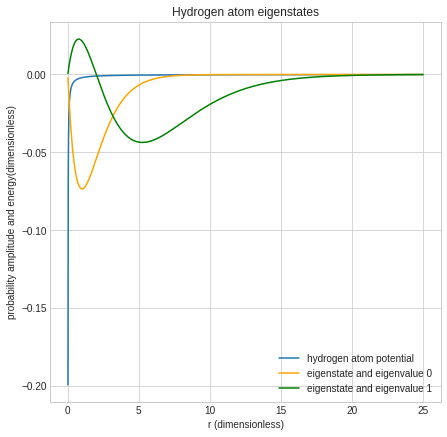

In [68]:
pot =  -esq*(2*m*l0)/(ys*hcross**2)*dy*0.1# scaled down potential energy function

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot()
ax.set(title = 'Hydrogen atom eigenstates', xlabel = 'r (dimensionless)', ylabel = 'probability amplitude and energy(dimensionless)')
ax.plot(ys,pot,label = 'hydrogen atom potential')
colors = ['orange', 'green']
for i in range(0,2):
    ax.plot(ys,-H_eigvectors2[i],label = 'eigenstate and eigenvalue %d'%i, color = colors[i])
    #ax.plot([0.01,25.0],[H_eigvalues2[i], H_eigvalues2[i]], color = colors[i])
ax.legend()
#plt.savefig("H2.png", dpi=500)

In [69]:
print(H_eigvalues2[0]*E0/(1.6e-19)) #ground state energy in eV
print(H_eigvalues2[1]*E0/(1.6e-19)) # first excited state energy in eV

-13.529589170286803
-3.382453640215905
